# Installations and Imports

In [ ]:
# !pip install kornia

In [280]:
pip show opencv-python

Name: opencv-python
Version: 4.8.0.76
Summary: Wrapper package for OpenCV python bindings.
Home-page: https://github.com/opencv/opencv-python
Author: 
Author-email: 
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: numpy, numpy, numpy, numpy
Required-by: dopamine-rl, imgaug


In [9]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [74]:
def grayscale(img):
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return gray_img

def blur(gray_img, blur_ksize):
    blurred_img = cv2.GaussianBlur(gray_img, (blur_ksize, blur_ksize), 0)
    return blurred_img

def resize_image(img, scale_percent):
    width = int(img.shape[1] * scale_percent / 100)
    height = int(img.shape[0] * scale_percent / 100)
    dim = (width, height)
    resized_img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    return resized_img

def sobel_edges(blurred_img):
    grad_x = cv2.Sobel(blurred_img, cv2.CV_64F, 1, 0, ksize=3)
    grad_y = cv2.Sobel(blurred_img, cv2.CV_64F, 0, 1, ksize=3)

    grad = cv2.magnitude(grad_x, grad_y)

    grad = cv2.normalize(grad, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')

    return grad

def image_to_sketch_sobel(image_path, blur_ksize=5, scale_percent=50, show_gray=False, show_blur=False, show_edges=False):
    img = cv2.imread(image_path)
    gray_img = grayscale(img)
    blurred_img = blur(gray_img, blur_ksize)
    edges = sobel_edges(blurred_img)
    sketch = 255 - edges  # Invert edges to get a sketch-like appearance

    if show_gray or show_blur or show_edges:
        images_to_show = []
        if show_gray:
            images_to_show.append(resize_image(gray_img, scale_percent))
        if show_blur:
            images_to_show.append(resize_image(blurred_img, scale_percent))
        if show_edges:
            images_to_show.append(resize_image(sketch, scale_percent))

        # Stack images horizontally (side by side)
        combined_image = np.hstack(images_to_show)

        # Display the combined image with cv2_imshow (for Google Colab)
        cv2_imshow(combined_image)

        return images_to_show[-1]

In [ ]:

def apply_clahe(image_input, clip_limit=2.0, tile_grid_size=(8, 8)):

    gray_image = cv2.cvtColor(image_input, cv2.COLOR_BGR2GRAY)    
    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_grid_size)
    clahe_image = clahe.apply(gray_image)
    return clahe_image


In [272]:
def sobel_edges(blurred_img):
    # Calculate the gradients in the x and y directions
    grad_x = cv2.Sobel(blurred_img, cv2.CV_64F, 1, 0, ksize=3)
    grad_y = cv2.Sobel(blurred_img, cv2.CV_64F, 0, 1, ksize=3)

    grad = cv2.magnitude(grad_x, grad_y)

    grad = cv2.normalize(grad, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')

    return grad

In [273]:
def image_to_sketch_sobel(image_path, blur_ksize=5, scale_percent=50, show_gray=False, show_blur=False, show_edges=False):
    img = cv2.imread(image_path)
    gray_img = grayscale(img)
    blurred_img = blur(gray_img, blur_ksize)
    edges = sobel_edges(blurred_img)
    sketch = 255 - edges  # Invert edges to get a sketch-like appearance

    if show_gray or show_blur or show_edges:
        images_to_show = []
        if show_gray:
            images_to_show.append(resize_image(gray_img, scale_percent))
        if show_blur:
            images_to_show.append(resize_image(blurred_img, scale_percent))
        if show_edges:
            images_to_show.append(resize_image(sketch, scale_percent))

        # Stack images horizontally (side by side)
        combined_image = np.hstack(images_to_show)

        # Display the combined image with cv2_imshow (for Google Colab)
        cv2_imshow(combined_image)

        return images_to_show[-1]



# Constant variables

In [274]:
image_path = '/content/2c6b34c8-39f5-4274-b7d3-12e123972625.jpg'

In [275]:
blur_ksize = 3
scale_percent = 100

# Test functions

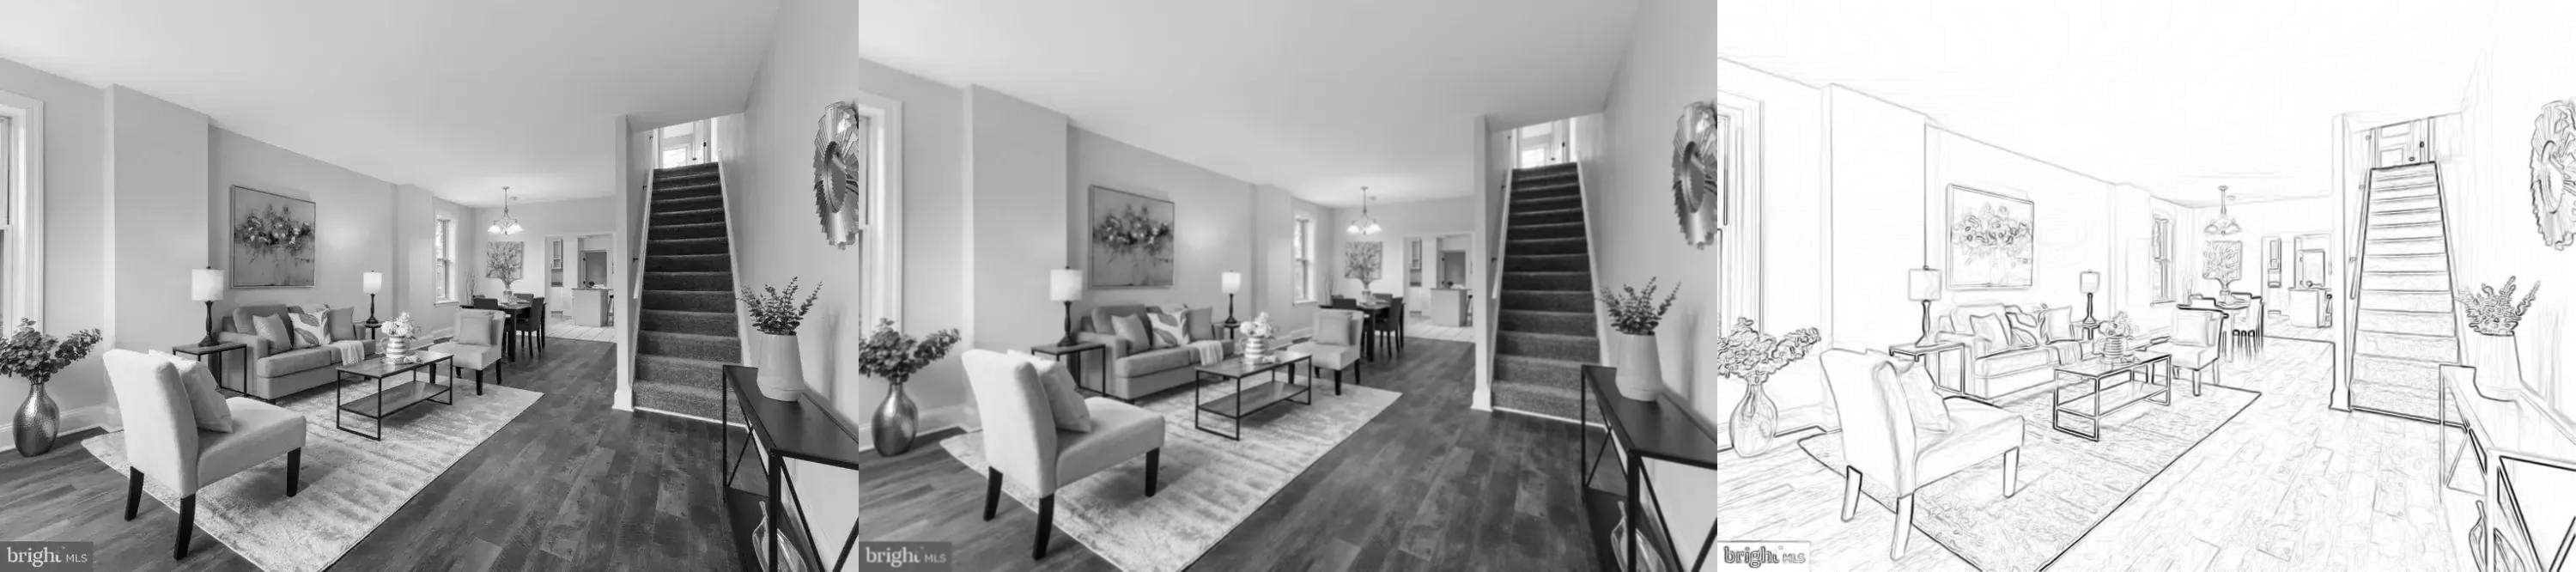

In [276]:
img = image_to_sketch_sobel(image_path=image_path,blur_ksize=blur_ksize,scale_percent=scale_percent,show_gray=True,show_blur=True,show_edges=True)